## Лабораторная работа 7.

## Группа: РИМ-111060

## Подгруппа задания (вариант): 3

### ФИО студентов:
#### Лисовский Кирилл Алексеевич
#### Никитенко Андрей Михайлович
#### Уксусников Николай Алексеевич
#### Савин Михаил Валерьевич
#### Степаненко Дмитрий Владимирович

## 1. Сначала импортируйте в свой код нужные библиотеки, функции и т.д.


In [36]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

## 2. Метод сингулярного спектрального анализа SSA реализуется в 2 этапа – разложение и группировка. Соответственно, нам потребуется написать несколько функций – для сингулярного разложения ряда и затем для его обратной группировки.

## 3-4. Начнем с этапа разложения. Внутри функции нам понадобится определить размерность траекторной X матрицы L x K. Это будет функция SSA_modes.

## 5-6. Самостоятельно заполните элементы данной матрицы X точками массива. Прежде чем переходить дальше, проверьте полученную матрицу на правильность построения для малых значений длины окна L.

## 7-8. Теперь в этой функции можно реализовать второй шаг метода SSA – это шаг сингулярного разложения. Сначала нужно создать полную матрицу S. Для разложения мы используем функцию, через которую сразу же получим нужное сингулярное разложение SVD.

## 9-10. Еще нужна матрица траекторных векторов. Рассчитайте данную матрицы самостоятельно. В результате выполнения своей работы функция SSA_modes(F, L) должна вернуть три значения: массив собственных чисел A, матрицу собственных векторов U и матрицу траекторных векторов V.

In [37]:
def SSA_modes(F, L):
    N = len(F)
    K = N - L + 1
    X = np.empty((L, K))
    
    i=0
    while i<L:           # Заполнение данной матрицы точками массива
        X[i] = F[i:K+i]
        i+=1
        
    S = np.dot(X, X.T)
    U, A, _ = np.linalg.svd(S)
    V = np.dot(X.T, U)
    
    return A,U,V

## 11.Проверьте правильность и работоспособность данной функции на следующем простом примере:

In [38]:
ts = np.array([3, 2, 1, 2, 3, 2, 1, 2, 3, 2, 1, 2, 3]) # мини временной ряд
A, U, V = SSA_modes(ts, 3) # его разложение с длиной окна = 3
print('A =', A) # собственные числа
print('U =', U) # собственные вектора
print('V =', V) # траекторные вектора

A = [129.66842566  12.           3.33157434]
U = [[-5.78869570e-01  7.07106781e-01  4.06091149e-01]
 [-5.74299610e-01  7.09966662e-16 -8.18645196e-01]
 [-5.78869570e-01 -7.07106781e-01  4.06091149e-01]]
V = [[-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  1.11022302e-15 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]
 [-4.03837711e+00  1.11022302e-15 -8.31570994e-01]
 [-3.46407750e+00  1.41421356e+00 -1.29257973e-02]
 [-2.88977789e+00 -4.44089210e-16  8.05719399e-01]
 [-3.46407750e+00 -1.41421356e+00 -1.29257973e-02]]


## 13. Далее нам нужна функция, которая будет реализовывать этап восстановления ряда. Пусть это будет функция SSA_group, у которой входными параметрами являются массив собственных значений A, массив собственных векторов U, массив траекторных векторов V, длина ряда N и массив группировки компонент I. Выходной параметр всего один – это массив, который содержит отсчеты восстановленного ряда.

## 14. При вызове этой функции мы, очевидно, передаем ей уже найденные величины A, U, V, N=len(F). Новым параметром будет только I. Длину окна L можно найти из длины массива собственных чисел: L = len(A). Еще нам понадобится K=N-L+1.

## 15-16. Пусть группировку I мы будем задавать в виде массива номеров компонент, которые мы хотим группировать вместе. Далее идет этап диагонального усреднения.

## 17. Далее Вы должны самостоятельно по формулам ниже построить процедуру диагонального усреднения.

In [39]:
def SSA_group(A, U, V, N, I):
    L = len(A)
    K = N - L + 1
    V = V.transpose()
    Z = np.dot(U[:, I], V[I, :])
    G = np.zeros(N)
    L1 = min(L,K)
    K1 = max(L,K)

    for k in range(0, L1-1):
        C=0
        for m in range(0,k+1):
            C = C+Z[m][k-m]
        G[k]=C/(k+1)
        
    for k in range(L1-1, K1):
        C=0
        for m in range(0,L1):
            C = C+Z[m][k-m]
        G[k] = C/L1
        
    for k in range(K1,N):
        C=0
        for m in range(k-K1+1,N-K1+1):
            C = C+Z[m][k-m]
        G[k] = C/(N-k)
    
    return G

## 18. Проверка работоспособности функции SSA_group:

In [40]:
ts1 = SSA_group(A, U, V, len(ts), [0, 1, 2])
print(ts1)

[3. 2. 1. 2. 3. 2. 1. 2. 3. 2. 1. 2. 3.]


## 19. Если все правильно реализовано, для тестового ряда постройте каждую компоненту отдельно (массив группировки [0], затем [1], затем [2]), и их попарные комбинации ([0, 1], [0, 2], [1, 2]). Изобразите их на рисунках относительно исходного временного ряда.

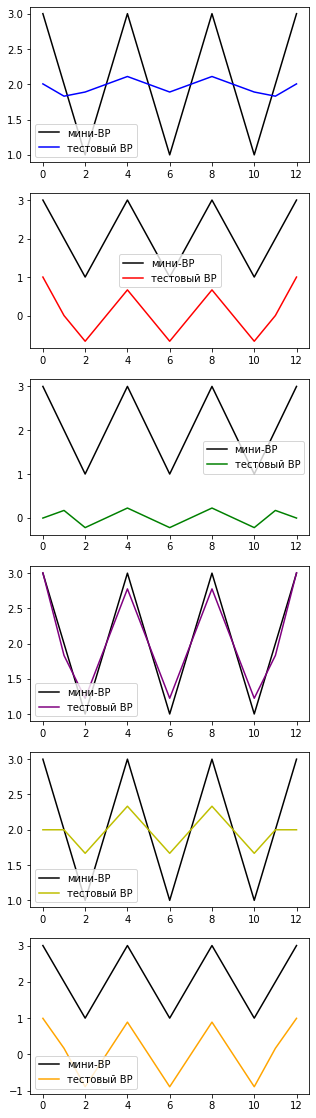

In [41]:
plt.figure(figsize = (5, 20))

ts1_0 = SSA_group(A, U, V, len(ts), [0])
plt.subplot(6,1,1)
plt.plot(ts, 'k', label='мини-ВР')
plt.plot(ts1_0, 'b', label='тестовый ВР')
plt.legend()
 
ts1_1 = SSA_group(A, U, V, len(ts), [1])
plt.subplot(6,1,2)
plt.plot(ts, 'k', label='мини-ВР')
plt.plot(ts1_1, 'r', label='тестовый ВР')
plt.legend()
 
ts1_2 = SSA_group(A, U, V, len(ts), [2])
plt.subplot(6,1,3)
plt.plot(ts, 'k', label='мини-ВР')
plt.plot(ts1_2, 'g', label='тестовый ВР')
plt.legend()

ts1_01 = SSA_group(A, U, V, len(ts), [0, 1])
plt.subplot(6,1,4)
plt.plot(ts, 'k', label='мини-ВР')
plt.plot(ts1_01, 'purple', label='тестовый ВР')
plt.legend() 

ts1_02 = SSA_group(A, U, V, len(ts), [0, 2])
plt.subplot(6,1,5)
plt.plot(ts, 'k', label='мини-ВР')
plt.plot(ts1_02, 'y', label='тестовый ВР')
plt.legend() 

ts1_12 = SSA_group(A, U, V, len(ts), [1, 2])
plt.subplot(6,1,6)
plt.plot(ts, 'k', label='мини-ВР')
plt.plot(ts1_12, 'orange', label='тестовый ВР')
plt.legend()

plt.show()

### 20. Отметим характерные особенности полученных компонент:
1. 0-компонента содержит некоторое среднее плавающее значение ряда (тренд), а уже 1-компонента и 2-компонента имеют среднее значение близкое к нулю.
2. 1-компонента и 2-компонента имеют одинаковый период, так как любая периодическая составляющая методом SSA всегда разлагается на парные компоненты. 
3. Амплитуда 1-компоненты выше амплитуды 2-компоненты, так как массив собственных чисел упорядочен по убыванию, то есть с ростом номера компоненты ее  «вклад» в исходный ряд уменьшается.

### 21. Важно отметить, что с ростом длины окна L разложения, все составляющие ряда будут «расплываться» по нескольким компонентам. То есть тренд не всегда есть 0-компонента, а скорее комбинация компонент с номерами близкими к нулю, а периодика не равна одной паре компонент, а есть комбинация нескольких пар с близкими номерами. Тем не менее, общий характер особенностей из пункта 20 сохраняется.

## 22-23. Теперь применим готовый метод SSA к некоторым периодическим временным рядам. Постройте следующий модельный ряд из 2 периодик с шумом:

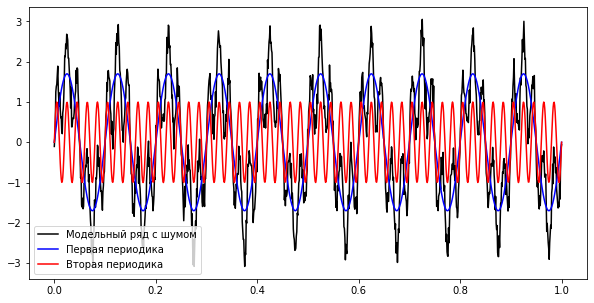

In [42]:
t = np.linspace(0, 1, 1024)
f1 = 10
f2 = 50
F_23=1.7*np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 5))
plt.plot(t, F_23, 'k', label='Модельный ряд с шумом')
plt.plot(t, 1.7*np.sin(2*np.pi*f1*t), 'b', label='Первая периодика')
plt.plot(t, np.sin(2*np.pi*f2*t), 'r', label='Вторая периодика')

plt.legend()
plt.show()

## 24. Самостоятельно подберите такую длину окна и метод группировки компонент, чтобы с помощью метода SSA выделить компоненты, наиболее близкие к исходным периодикам в модельном ряде. Постройте их на рисунке совмещенно с исходным зашумленным рядом F:

In [43]:
A, U, V = SSA_modes(F_23, 100)
print(A) # собственные числа
print(U) # собственные вектора
print(V) # траекторные вектора

[6.82458273e+04 6.46701381e+04 2.39715846e+04 2.27508401e+04
 6.14322874e+01 6.12246875e+01 6.04571053e+01 6.03470077e+01
 5.83724903e+01 5.79109189e+01 5.26992896e+01 5.26632445e+01
 5.18128284e+01 5.17581998e+01 5.14420013e+01 5.14017455e+01
 5.07087715e+01 5.04831336e+01 5.01303401e+01 4.96683299e+01
 4.92384702e+01 4.90888920e+01 4.88025127e+01 4.84686092e+01
 4.80598931e+01 4.77148142e+01 4.73786302e+01 4.70568163e+01
 4.67080435e+01 4.64388377e+01 4.63026188e+01 4.62916316e+01
 4.58537718e+01 4.56232216e+01 4.55719296e+01 4.53326066e+01
 4.50448385e+01 4.38586536e+01 4.33405435e+01 4.31195173e+01
 4.28474844e+01 4.27254136e+01 4.22109828e+01 4.21557772e+01
 4.18697531e+01 4.18188848e+01 4.14213135e+01 4.11633725e+01
 4.11072600e+01 4.10599989e+01 4.06876937e+01 4.01757297e+01
 3.95063037e+01 3.88031753e+01 3.87832956e+01 3.86082685e+01
 3.85877781e+01 3.84390538e+01 3.82559537e+01 3.78927679e+01
 3.73829958e+01 3.73732401e+01 3.67210283e+01 3.65914742e+01
 3.58161448e+01 3.554032

In [44]:
F1 = SSA_group(A, U, V, len(F_23), [0, 1, 2, 3, 4, 5, 6])
print(F1)

[ 0.01107628  0.34665726  0.63873388 ... -0.65652857 -0.19566748
  0.13086999]


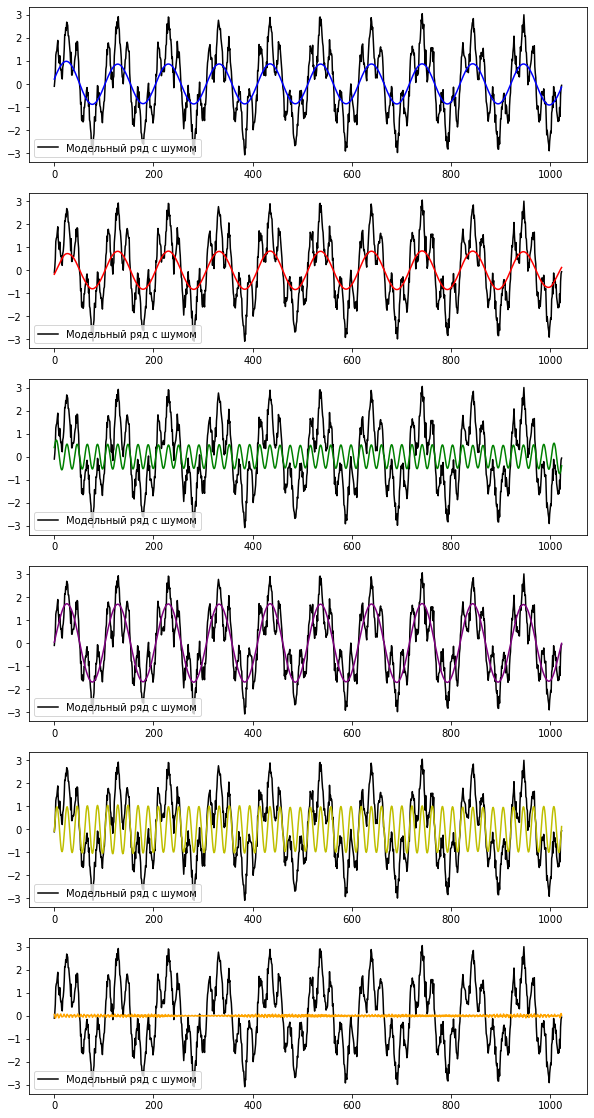

In [47]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(F_23), [0])
plt.subplot(6,1,1)
plt.plot(F_23, 'k', label='Модельный ряд с шумом')
plt.plot(F1_0, 'b')
plt.legend()

F1_1 = SSA_group(A, U, V, len(F_23), [1])
plt.subplot(6,1,2)
plt.plot(F_23, 'k', label='Модельный ряд с шумом')
plt.plot(F1_1, 'r')
plt.legend()

F1_2 = SSA_group(A, U, V, len(F_23), [2])
plt.subplot(6,1,3)
plt.plot(F_23, 'k', label='Модельный ряд с шумом')
plt.plot(F1_2, 'g')
plt.legend() 

F1_01 = SSA_group(A, U, V, len(F_23), [0,1])
plt.subplot(6,1,4)
plt.plot(F_23, 'k', label='Модельный ряд с шумом')
plt.plot(F1_01, 'purple')
plt.legend() 

F1_02 = SSA_group(A, U, V, len(F_23), [2,3])
plt.subplot(6,1,5)
plt.plot(F_23, 'k', label='Модельный ряд с шумом')
plt.plot(F1_02, 'y')
plt.legend() 

F1_12 = SSA_group(A, U, V, len(F_23), [4,5,6])
plt.subplot(6,1,6)
plt.plot(F_23, 'k', label='Модельный ряд с шумом')
plt.plot(F1_12, 'orange')
plt.legend()

plt.show()

### F1_01 = SSA_group(A, U, V, len(F_23), [0,1]) - здесь видим гармонику 1.7*np.sin(2*np.pi*f1*t)
### F1_02 = SSA_group(A, U, V, len(F_23), [2,3]) - здесь видим гармонику np.sin(2*np.pi*f2*t)
### [0] - тренд временного ряда

## 25. Теперь аналогичной методикой попытаемся построить тренд для сильно зашумленного ВР. Пусть задан ВР:

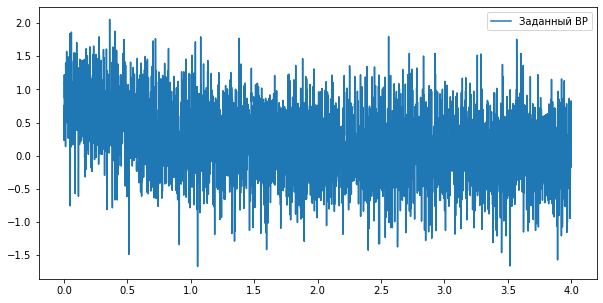

In [49]:
t = np.linspace(0,4,4096)
F = np.exp(-0.4*np.pi*t) + 0.5*rand.randn(len(t))

plt.figure(figsize = (10, 5))
plt.plot(t,F, label='Заданный ВР')
plt.legend()

plt.show()

## 26. Используя метод SSA выделите этот экспоненциальный тренд np.exp(-0.4*np.pi*t). Длину окна и метод группировки определите сами. Постройте на графиках исходный тренд и тот, что был получен Вами с помощью метода SSA.

In [50]:
A, U, V = SSA_modes(F, 200)

F1 = SSA_group(A, U, V, len(F), [0, 1, 2,3,4,5,6])
print(F1)

print(len(F1))

[ 0.95208221  1.03617459  0.95265313 ...  0.0378871   0.08604142
 -0.13907593]
4096


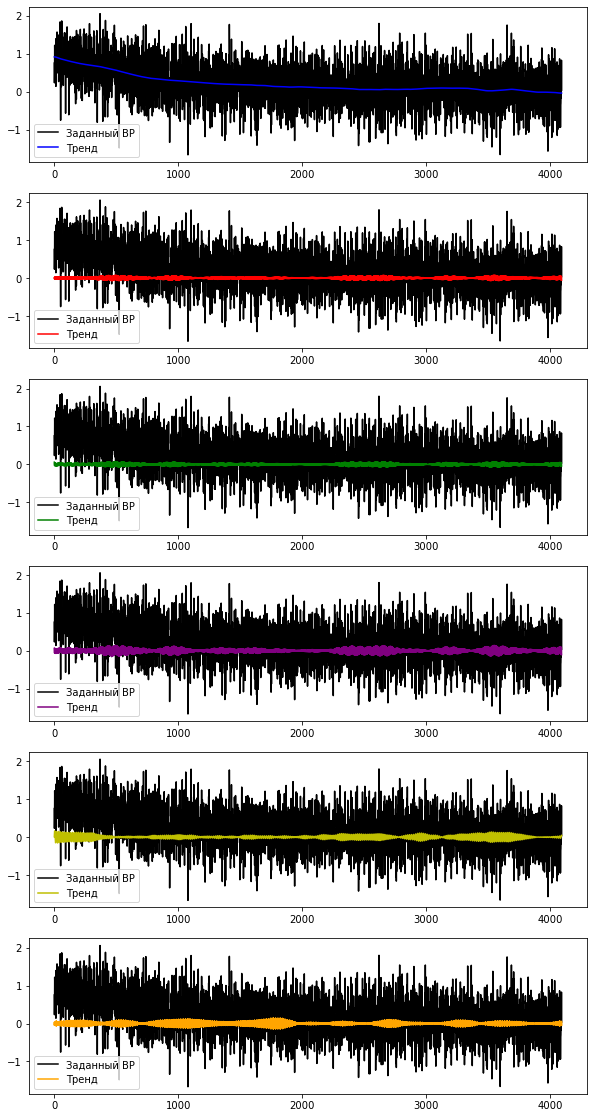

In [51]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(F), [0])
plt.subplot(6,1,1)
plt.plot(F, 'k', label='Заданный ВР')
plt.plot(F1_0, 'b', label='Тренд')
plt.legend()
 
F1_1 = SSA_group(A, U, V, len(F), [1])
plt.subplot(6,1,2)
plt.plot(F, 'k', label='Заданный ВР')
plt.plot(F1_1, 'r', label='Тренд')
plt.legend()
 
F1_2 = SSA_group(A, U, V, len(F), [2])
plt.subplot(6,1,3)
plt.plot(F, 'k', label='Заданный ВР')
plt.plot(F1_2, 'g', label='Тренд')
plt.legend()

F1_01 = SSA_group(A, U, V, len(F), [1,2])
plt.subplot(6,1,4)
plt.plot(F, 'k', label='Заданный ВР')
plt.plot(F1_01, 'purple', label='Тренд')
plt.legend() 

F1_02 = SSA_group(A, U, V, len(F), [3,4])
plt.subplot(6,1,5)
plt.plot(F, 'k', label='Заданный ВР')
plt.plot(F1_02, 'y', label='Тренд')
plt.legend()

F1_12 = SSA_group(A, U, V, len(F), [5,6])
plt.subplot(6,1,6)
plt.plot(F, 'k', label='Заданный ВР')
plt.plot(F1_12, 'orange', label='Тренд')
plt.legend()

plt.show()

## 27. Создайте периодический сигнал с изломом частоты:

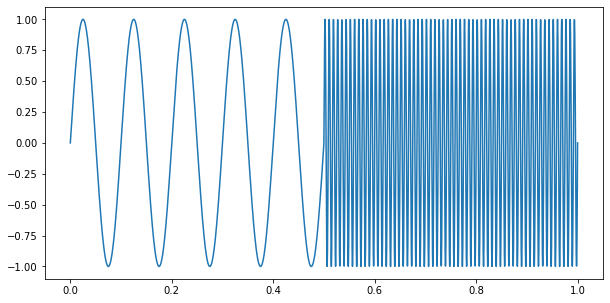

In [52]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)
plt.show()

## 28. Самостоятельно подберите такую длину окна и метод группировки компонент, чтобы с помощью метода SSA выделить компоненты, наиболее близкие к исходным периодикам на двух половинках временного интервала в модельном ряде.

## 29. Постройте их вместе с исходным рядом на одном рисунке.

In [53]:
A, U, V = SSA_modes(x2, 100)

F1 = SSA_group(A, U, V, len(x2), [0, 1, 2,3,4,5,6])
print(F1)

[-0.00045534  0.01491242  0.03028308 ... -0.35829122 -0.18154533
  0.00133344]


### C помощью метода SSA выделим компоненты, наиболее близкие к исходным периодикам на двух половинках временного интервала в модельном ряде:

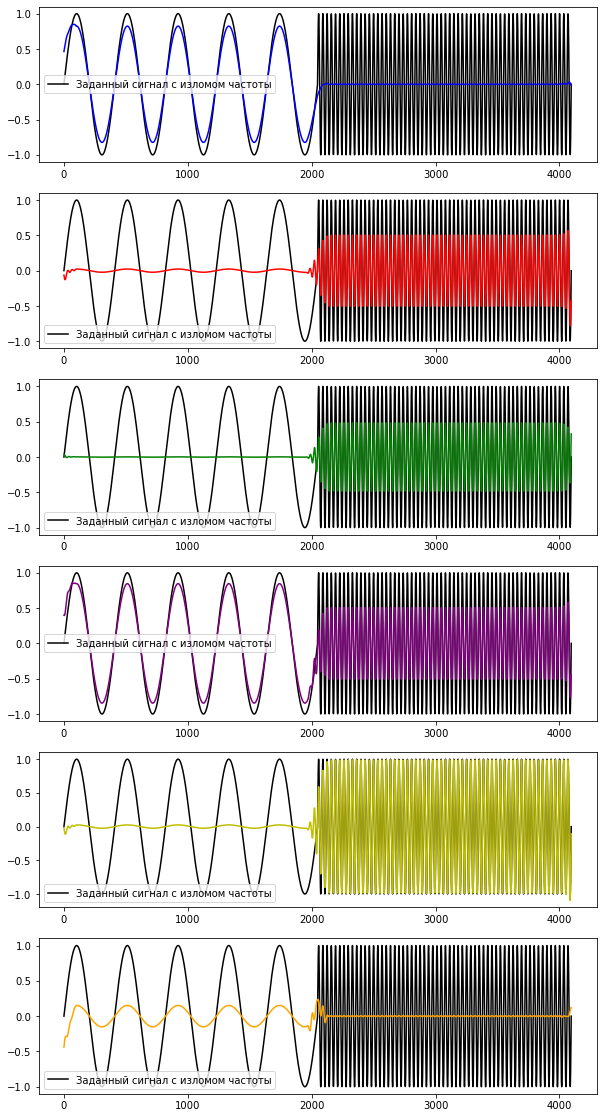

In [57]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(x2), [0])
plt.subplot(6,1,1)
plt.plot(x2, 'k', label='Заданный сигнал с изломом частоты')
plt.plot(F1_0, 'b')
plt.legend() 
 
F1_1 = SSA_group(A, U, V, len(x2), [1])
plt.subplot(6,1,2)
plt.plot(x2, 'k', label='Заданный сигнал с изломом частоты')
plt.plot(F1_1, 'r')
plt.legend() 
 
F1_2 = SSA_group(A, U, V, len(x2), [2])
plt.subplot(6,1,3)
plt.plot(x2, 'k', label='Заданный сигнал с изломом частоты')
plt.plot(F1_2, 'g')
plt.legend() 

F1_01 = SSA_group(A, U, V, len(x2), [0,1])
plt.subplot(6,1,4)
plt.plot(x2, 'k', label='Заданный сигнал с изломом частоты')
plt.plot(F1_01, 'purple')
plt.legend() 

F1_02 = SSA_group(A, U, V, len(x2), [1,2])
plt.subplot(6,1,5)
plt.plot(x2, 'k', label='Заданный сигнал с изломом частоты')
plt.plot(F1_02, 'y')
plt.legend() 

F1_12 = SSA_group(A, U, V, len(x2), [3,4])
plt.subplot(6,1,6)
plt.plot(x2, 'k', label='Заданный сигнал с изломом частоты')
plt.plot(F1_12, 'orange')
plt.legend() 

plt.show()

###  [0] - представляет первую половинку, [1,2] - вторую половинку

## 30. Смоделируйте временной ряд из 4 гармоник с шумом, и разделите его на компоненты с помощью метода SSA:

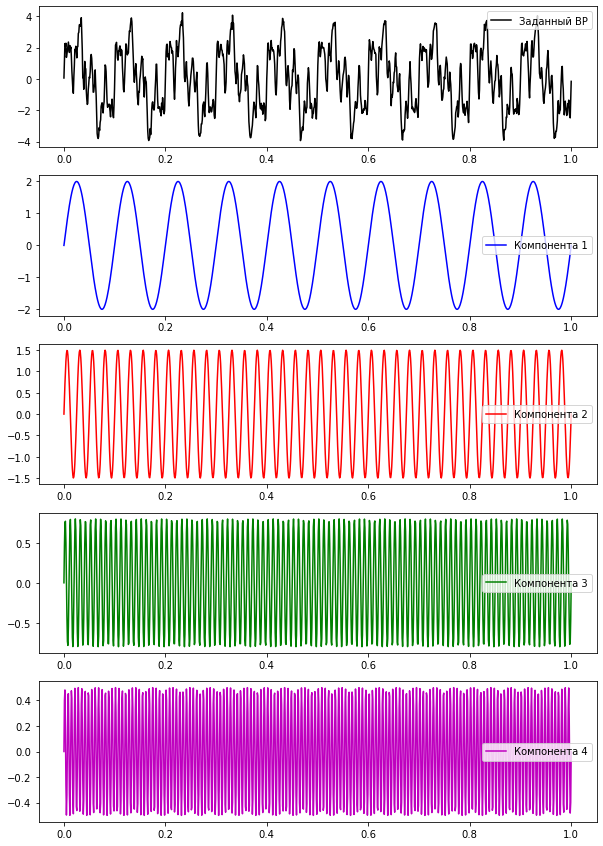

In [64]:
t = np.linspace(0,1,1024)
f1 = 10
f2 = 40
f3 = 100
f4 = 150
F_30=2.0*np.sin(2*np.pi*f1*t)+1.5*np.sin(2*np.pi*f2*t)+0.8*np.sin(2*np.pi*f3*t)+0.5*np.sin(2*np.pi*f4*t)+0.2*rand.randn(len(t))
plt.figure(figsize = (10, 15))
plt.subplot(5,1,1)

plt.plot(t, F_30, 'k', label='Заданный ВР')
plt.legend()
plt.subplot(5,1,2)

plt.plot(t, 2.0*np.sin(2*np.pi*f1*t), 'b', label='Компонента 1')
plt.legend()
plt.subplot(5,1,3)

plt.plot(t, 1.5*np.sin(2*np.pi*f2*t), 'r', label='Компонента 2')
plt.legend()
plt.subplot(5,1,4)

plt.plot(t, 0.8*np.sin(2*np.pi*f3*t), 'g', label='Компонента 3')
plt.legend()
plt.subplot(5,1,5)

plt.plot(t, 0.5*np.sin(2*np.pi*f4*t), 'm', label='Компонента 4')
plt.legend()

plt.show()

In [66]:
A, U, V = SSA_modes(F_30, 100)

F1 = SSA_group(A, U, V, len(F_30), [0, 1, 2,3,4,5,6,7,8])
print(F1)

[-0.03267753  1.32322542  2.18969369 ... -2.30042498 -1.44818834
 -0.08783472]


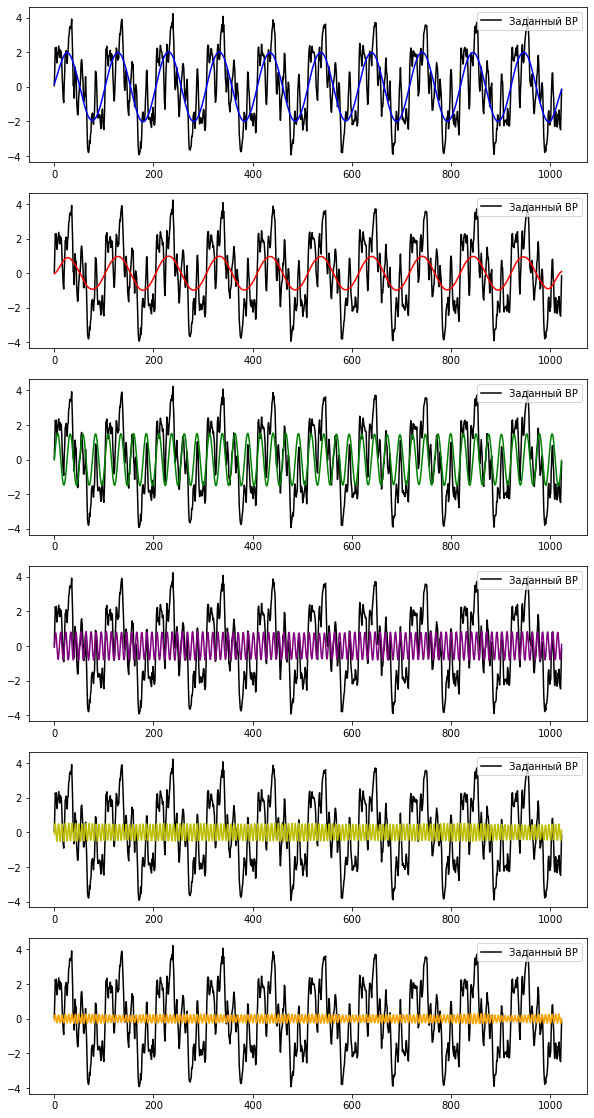

In [67]:
plt.figure(figsize = (10, 20))

F1_0 = SSA_group(A, U, V, len(F_30), [0,1])
plt.subplot(6,1,1)
plt.plot(F_30, 'k', label='Заданный ВР')
plt.plot(F1_0, 'b')
plt.legend()

F1_1 = SSA_group(A, U, V, len(F_30), [1])
plt.subplot(6,1,2)
plt.plot(F_30, 'k', label='Заданный ВР')
plt.plot(F1_1, 'r')
plt.legend()

F1_2 = SSA_group(A, U, V, len(F_30), [2,3])
plt.subplot(6,1,3)
plt.plot(F_30, 'k', label='Заданный ВР')
plt.plot(F1_2, 'g')
plt.legend() 

F1_01 = SSA_group(A, U, V, len(F_30), [4,5])
plt.subplot(6,1,4)
plt.plot(F_30, 'k', label='Заданный ВР')
plt.plot(F1_01, 'purple')
plt.legend()

F1_02 = SSA_group(A, U, V, len(F_30), [6,7])
plt.subplot(6,1,5)
plt.plot(F_30, 'k', label='Заданный ВР')
plt.plot(F1_02, 'y')
plt.legend() 

F1_12 = SSA_group(A, U, V, len(F_30), [7,8])
plt.subplot(6,1,6)
plt.plot(F_30, 'k', label='Заданный ВР')
plt.plot(F1_12, 'orange')
plt.legend()

plt.show()

### [0,1] - первая гармоника, [2,3] - вторая, [4,5] - третья, [6,7] - четвертая

## 31. Теперь на основе метода SSA реализуем прогноз временных рядов. Пусть в результате декомпозиции методом SSA получены все необходимые собственные тройки. Прогноз строится на M точек вперед. 
## 32. Тогда прогноз методом SSA-R строится следующей последовательностью действий. Сначала вычислим норму последнего вектора из матрицы U для заданной группировки компонент.

## 33-34. Нам надо вычислить ряд весовых коэффициентов R. Пусть ВР, восстановленный методом SSA по группировке I компонент, называется G, а ряд новой длины N+M, то есть восстановленный ряд и его прогноз, называется Q.

In [68]:
def SSA_R(F, L, I, M):
    N = len(F)
    A, U, V = SSA_modes(F, L)
    G = SSA_group(A, U, V, N, I)
    
    Q = np.zeros(N + M) # Увеличиваем матрицу Q на M прогнозируемых точек
    
    vu = np.linalg.norm(U[-1, I])
    R = np.sum(U[L - 1, I] * U[0:L - 1, I], 1)
    R = R / (1 - vu * vu)
    
    for i in range(0, N):
        Q[i] = G[i]
        
    for i in range(N, N + M - 1):
        A=0
        for j in range(0, L-2):
            A += R[j]*Q[i-j-1] 
        Q[i] = A                   
    
    return Q

## 35. Постройте прогноз методом SSA-R для ряда из пункта 23 (две периодики) на 256 точек вперед, подберите для него наилучшие параметры:

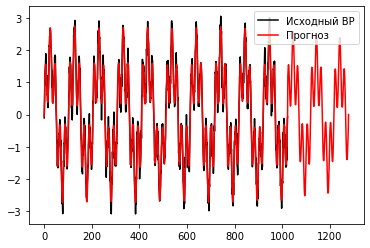

In [69]:
Q = SSA_R(F_23, 100, [0,1,2,3], 256) # прогноз методом SSA-R для ряда из п.23
plt.plot(F_23,'k',label='Исходный ВР')
plt.plot(Q, 'r',label='Прогноз')
plt.legend()
plt.show()

## 36. Постройте прогноз методом SSA-R для ряда из пункта 30 на 256 точек вперед, подберите для него наилучшие параметры:

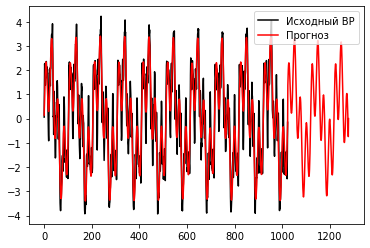

In [70]:
Q = SSA_R(F_30, 100, [0,1,2,3], 256)# прогноз методом SSA-R для ряда из п.30
plt.plot(F_30,'k',label='Исходный ВР')
plt.plot(Q, 'r',label='Прогноз')
plt.legend()
plt.show()

## 37. Загрузите из mat-файла Fort.mat ряд, содержащий отсчеты некоторого реального ВР, всего 174 отсчета в вектор-строке:

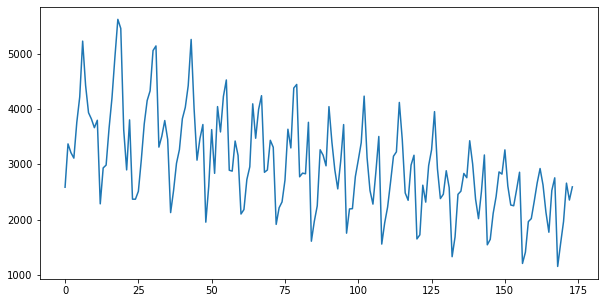

In [71]:
file = h5py.File('Fort.mat','r')
data = file.get('Fort')
fort = np.array(data)
F_fort = np.ravel(fort)
plt.figure(figsize = (10, 5))
plt.plot(F_fort)
plt.show()

## 38. Постройте его ретроспективный прогноз методом SSA-R, подберите параметры самостоятельно. Начальная точка прогноза определяется студентом самостоятельно. Длина прогноза студентами выбирается самостоятельно, она должна быть не меньше 24 отсчетов. Графики исходного ряда Fort и прогноза строятся вместе, так как они имеют малую длину и вполне могут поместиться рядом с достаточной точностью.

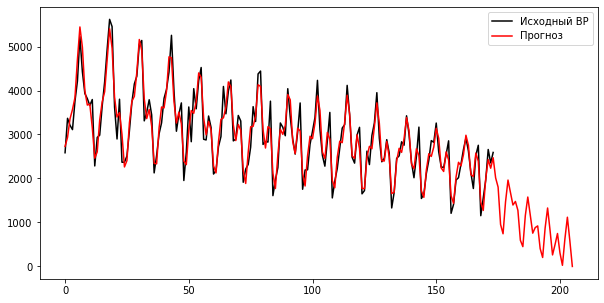

In [72]:
Q = SSA_R(F_fort, 20, [0,1,2,3,4,5], 32)# прогноз методом SSA-R для ряда Fort
plt.figure(figsize = (10, 5))
plt.plot(F_fort,'k', label='Исходный ВР')
plt.plot(Q, 'r', label='Прогноз')
plt.legend()
plt.show()

### 39.Теперь самостоятельно реализуйте метод прогноза на основе SSA с итерационной аппроксимацией (название в лекциях – стохастический SSA-прогноз).
### 40. Проведем частичный SSA-анализ заданного ВР: без диагонального усреднения (последний этап).
### 41. К ВР добавляется всего один новый случайный отсчет из диапазона уже имевшихся уровней ряда.
### 42. Этот ряд длины N+1 подвергается SSA-декомпозиции (только шаги разложения и формирования траекторной матрицы), но без изменения оценки параметров, то есть только на основе их предыдущих оценок.
### 43. Полученные собственные тройки нового ряда группируются и усредняются на основе метода группировки I.
### 44. В результате усреднения будет получен новый временной ряд, для которого первые N отсчетов совпадают с ВР, а последний отсчет является пред-прогнозом.
### 45. Для получения точного прогноза, новый отсчет ряда приравнивается этому приближению, после чего предыдущие шаги повторяются до тех пор, пока значение не перестанет изменяться с увеличением числа шагов.
### 46. Полученный в результате отсчет принимается за первую точку прогноза. Для продолжения прогноза, новый ряд длины N+1 становится ВР для прогнозирования, и алгоритм повторяется вновь. На протяжении всего алгоритма прогноза нет необходимости заново искать необходимую группировку компонент.

## 47. Постройте ретроспективный прогноз данным методом для ряда Fort.

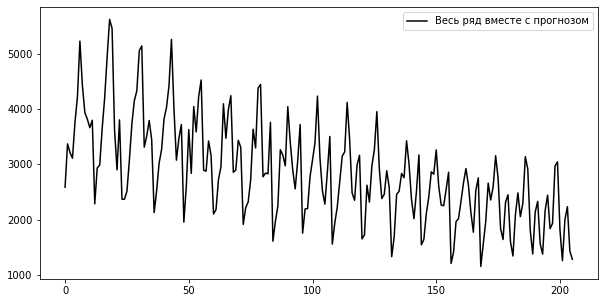

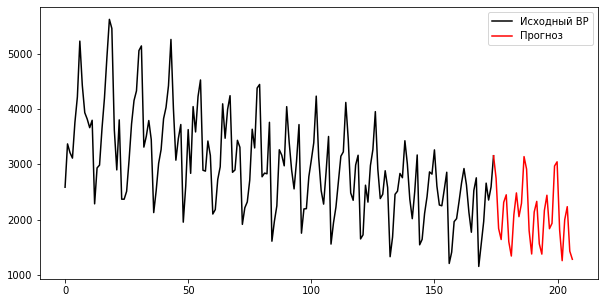

In [73]:
lin = len(F_fort) # длина исходного временного ряда

M = 32 # количество прогнозируемых отсчетов
L = 20 # длина окна разложения
I = [0,1,2,3,4,5] # массив группировки компонент
eps = 0.1 # некое эпсилон - наше допущение: 
          # насколько прогнозируемая точка далека от нужной

for i in range (M): # обработка по одной отчке
    f_new = np.random.choice(F_fort) # выбор случайной точки
    while True:
        F2 = np.append(F_fort, f_new) # добавление случайной точки к ряду
        A, U, V = SSA_modes(F2,L) #  Разложение нового ряда
        G = SSA_group(A, U, V, len(F2), I) # сгруппируем ряд обратно
        if (np.abs(f_new-G[len(G)-1]) < eps): # цикл завершится как только мы достигнем уровня допущения
            break
        f_new = G[len(G)-1]
    F_fort = F2
     
plt.figure(figsize = (10, 5))
plt.plot(F_fort,'k', label='Весь ряд вместе с прогнозом')
plt.legend()

t_prognoz = np.linspace(lin,len(F_fort),M) # сформируем прогнозируемое время
plt.figure(figsize = (10, 5))
plt.plot(F_fort[:lin+1],'k', label='Исходный ВР')
plt.plot(t_prognoz, F_fort[lin:], 'r', label='Прогноз')
plt.legend()
plt.show()

## Выводы по работе

В ходе выполнения данной лабораторной работы были изучены подходы к рассмотрению метода сингулярного спектрального анализа SSA (МЕТОД SSA – «ГУСЕНИЦА»), который относится к адаптивным методам, и, потому весьма эффективен для анализа и прогноза множества различных временных рядов, в том числе и нестационарных.

Базовый вариант метода состоит в следующем:
#### 1. Преобразовании одномерного ряда в многомерный с помощью однопараметрической сдвиговой процедуры (отсюда и название "Гусеница");
#### 2. Исследовании полученной многомерной траектории с помощью анализа главных компонент (сингулярного разложения);
#### 3. Восстановлении (аппроксимации) ряда по выбранным главным компонентам.

Таким образом, результатом применения метода является разложение временного ряда на простые компоненты: медленные тренды, сезонные и другие периодические или колебательные составляющие, а также шумовые компоненты. Полученное разложение может служить основой прогнозирования как самого ряда, так и его отдельных составляющих. "Гусеница" допускает естественное обобщение на многомерные временные ряды, а также на случай анализа изображений.

По итогам работы дана обобщённая оценка полученным результатам с учётом возможностей популярных python-библиотек.